# CNN

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-contrib-python

     -------------------------------------- 44.8/44.8 MB 998.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [7]:
import tensorflow as tf

C:\Users\Pratima Kumari\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

In [3]:
# its important to split the training and testing - Data set is stored in the path specified.

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Training and Validation\\",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Testing\\",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [5]:
# We shall build the model here! 
# Simple CNN shall do the task, You can try other tech as well. 
# Try with other activation functions also. 

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
# It is time to compile the model, let us compile.

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# let's get the model fit. 

r = model.fit(train_dataset, epochs = 2, validation_data = test_dataset)

# Epochs you can vary! 

Epoch 1/2
58/58 [==============================] - 45s 736ms/step - loss: 0.3134 - accuracy: 0.8914 - val_loss: 0.3353 - val_accuracy: 0.9265
Epoch 2/2
58/58 [==============================] - 40s 693ms/step - loss: 0.1701 - accuracy: 0.9465 - val_loss: 0.2998 - val_accuracy: 0.9118


In [10]:
# Can we work on the testing dataset, the predictions happen here.

predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 81ms/step


In [11]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [12]:
print(len(predictions))

68


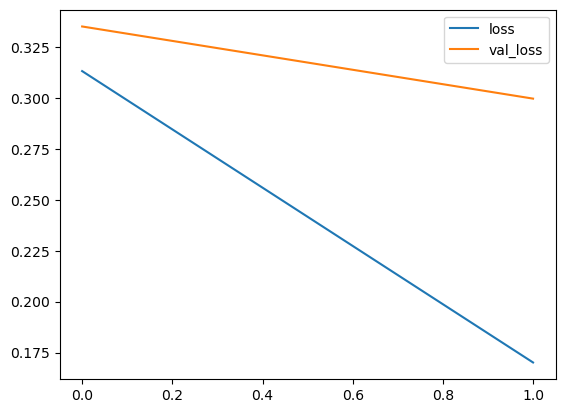

In [13]:
# it's time to plot it! Lets plot loss.

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

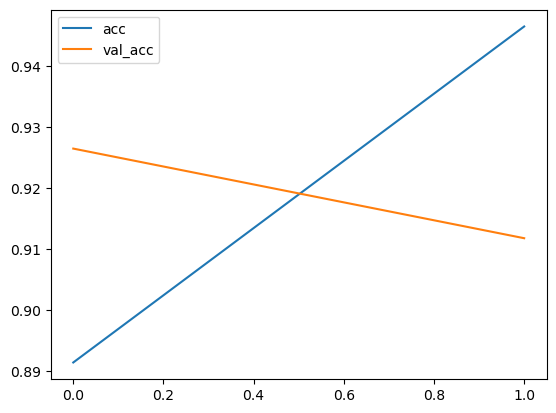

In [14]:
# How much accurate it is? 

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# This helps in taking individual images from the Dataset, load and check results. 

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 121ms/step
[[0.]]


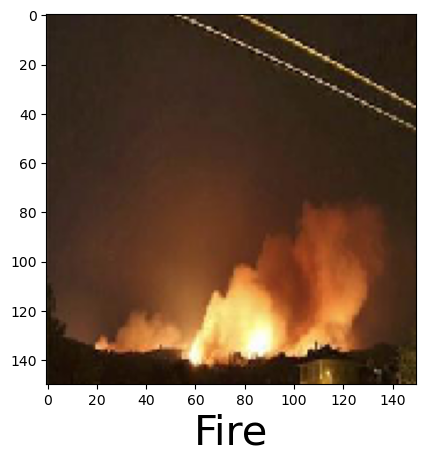

In [16]:
predictImage("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Testing\\fire\\abc190.jpg")

1/1 [==============================] - 0s 32ms/step
[[0.]]


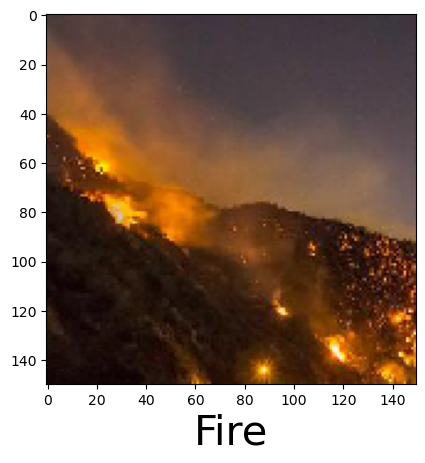

In [23]:
predictImage("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Testing\\fire\\abc181.jpg")

1/1 [==============================] - 0s 27ms/step
[[1.]]


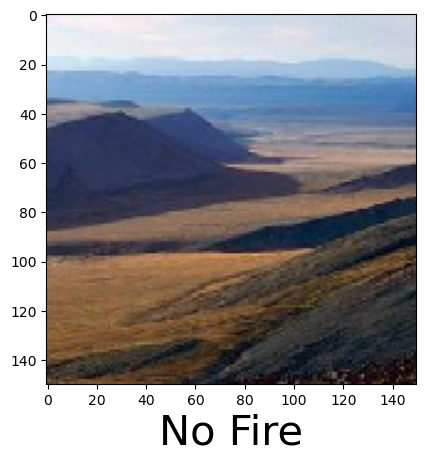

In [25]:
predictImage("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Testing\\nofire\\abc347.jpg")

1/1 [==============================] - 0s 29ms/step
[[1.]]


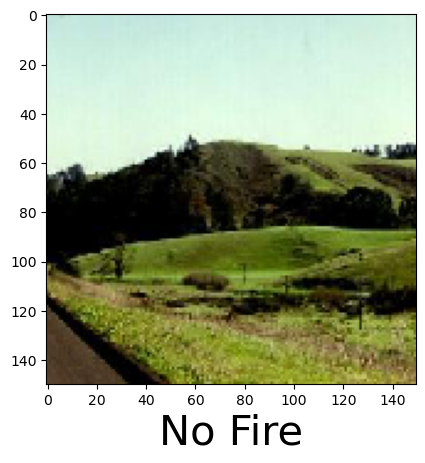

In [26]:
predictImage("C:\\Users\\adity\\OneDrive\\Desktop\\forest_fire\\Testing\\nofire\\abc359.jpg")

# VGG16 METHODS

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [30]:
# Load the pre-trained VGG16 model without the top layers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers

for layer in base_model.layers:
    layer.trainable = False

# Create a custom model for binary classification

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 61s 1us/step


In [31]:
# Load and preprocess your two images

img_fire = image.load_img('fire_image.jpg', target_size=(224, 224))
img_non_fire = image.load_img('nofire_image.jpg', target_size=(224, 224))

img_fire = image.img_to_array(img_fire)
img_fire = np.expand_dims(img_fire, axis=0)
img_fire = tf.keras.applications.vgg16.preprocess_input(img_fire)

img_non_fire = image.img_to_array(img_non_fire)
img_non_fire = np.expand_dims(img_non_fire, axis=0)
img_non_fire = tf.keras.applications.vgg16.preprocess_input(img_non_fire)

In [33]:
# Predict the two images
prediction_fire = model.predict(img_fire)
prediction_non_fire = model.predict(img_non_fire)

# Print the results

if prediction_fire > prediction_non_fire:
    print("The image is a forest fire.")
else:
    print("The image is a non-fire scene.")  

1/1 [==============================] - 0s 121ms/step
The image is a forest fire.
